In [ ]:
# If you don't have deepchecks installed yet:
import sys
!{sys.executable} -m pip install deepchecks -U --quiet #--user

     |████████████████████████████████| 216 kB 13.7 MB/s 
     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 9.8 MB 74.3 MB/s 


In [ ]:
import pandas as pd
df1= pd.read_csv("/content/stand_norm_e1.txt", sep=' ', header=None, names=["F0","F1","F2","F3","F4","F5","F6","F7"])# ,parse_dates=['Date'])#, date_parser=mydateparser)#, skiprows=1,names=["Date","id","Tissue","Rep","Repetition","MDA5",] )
df2= pd.read_csv("/content/stand_norm_e2.txt", sep=' ', header=None,names=["F8","F9","F10","F11","F12","F13","F14",'F15'])
y= pd.read_csv("/content/y2_e1.txt", sep=' ', header=None, names=['Phase'])

In [ ]:
data=df1.join(df2)
data=data.join(y)

In [ ]:
data.shape

(13762, 17)

In [ ]:
data.describe()

In [ ]:
df= data.astype(int).round(0)

In [ ]:
data.Phase.astype('str')

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
#import emoji
%matplotlib inline 


In [ ]:
data.columns

Index(['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'Phase'],
      dtype='object')

In [ ]:
#data2=data.sort_values(by=(['']))
data2=data.melt(id_vars=["Phase"])
data2.head(2)

,Phase,variable,value
0,0.0,F0,193.978268
1,0.0,F0,82.171881


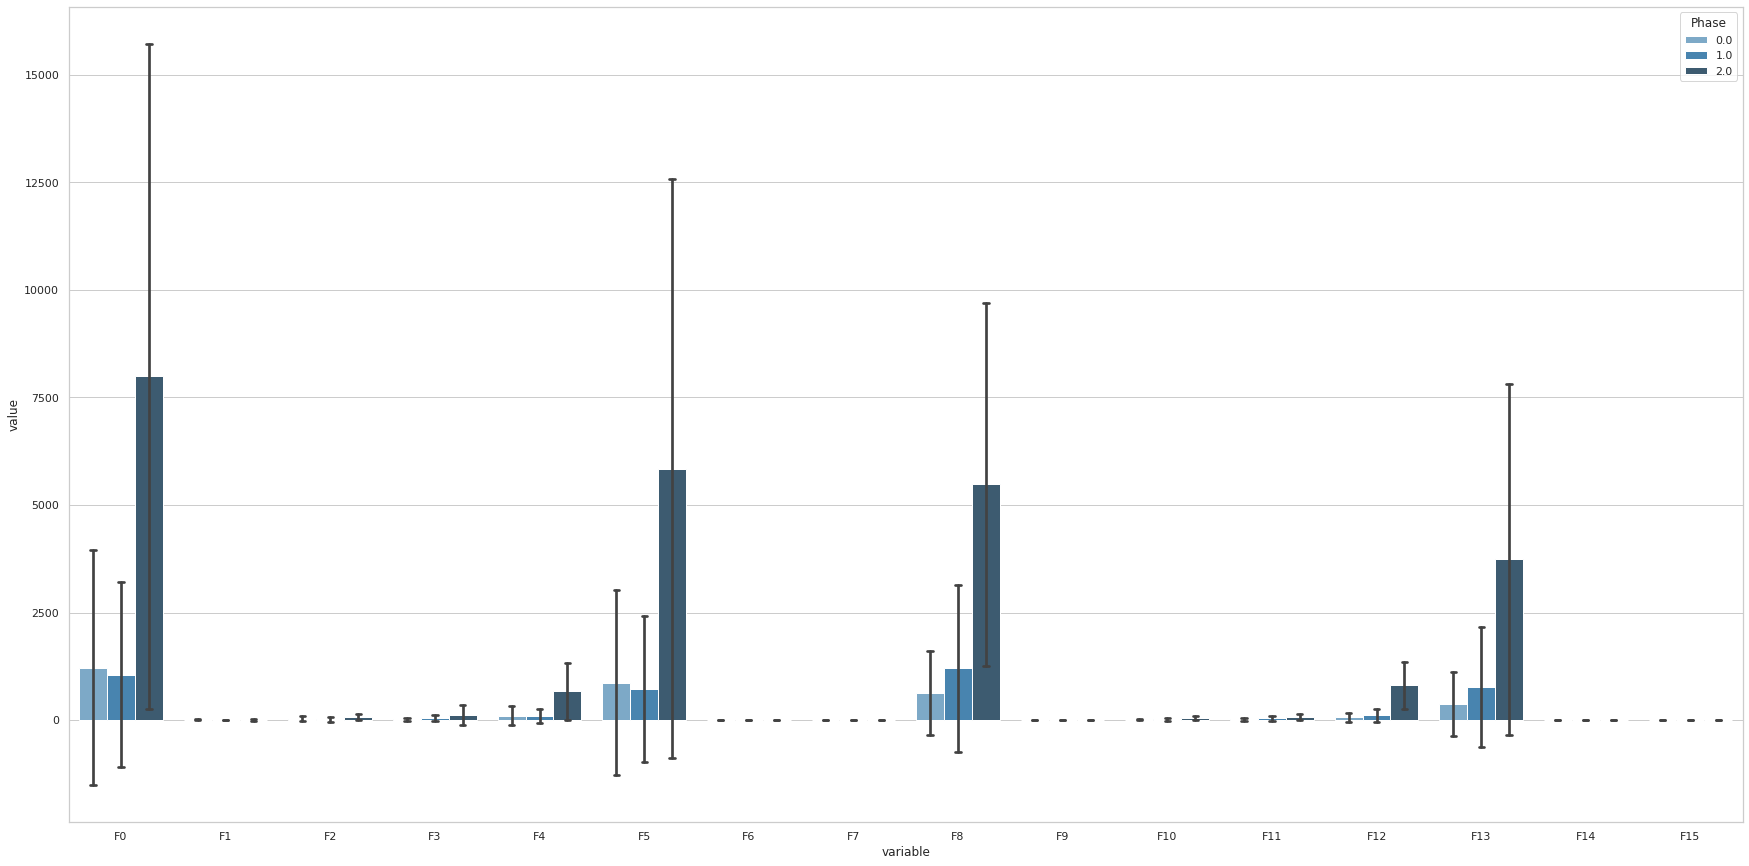

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#df1=df.groupby(by=["dates","Tissue"]).mean()#aggregate({"logTMF":"mean", "logEC":"mean","logSA":"mean"})
plt.figure(figsize=(30,15))
sns.set(style='whitegrid',)
sns.barplot(x="variable", y="value",data=data2,hue='Phase',#,hue_order=['6xkm','7BV2', '6xez_helicase'],
ci="sd", capsize=.05, palette="Blues_d"),#order=["Hk", "Br"])
plt.show()

In [ ]:
data2.head(2)

,Phase,variable,value
0,0.0,F0,193.978268
1,0.0,F0,82.171881


[Text(0.5, 1.0, 'Anti_COVID19 _dataset: T-SNE projection')]

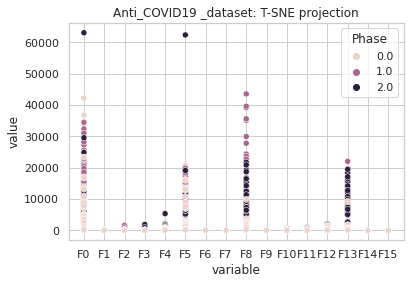

In [ ]:
sns.scatterplot(x=data2['variable'], y=data2['value'], hue=data2['Phase'],
                #palette=sns.color_palette("hls"),
                data=data2).set(title="Features") 

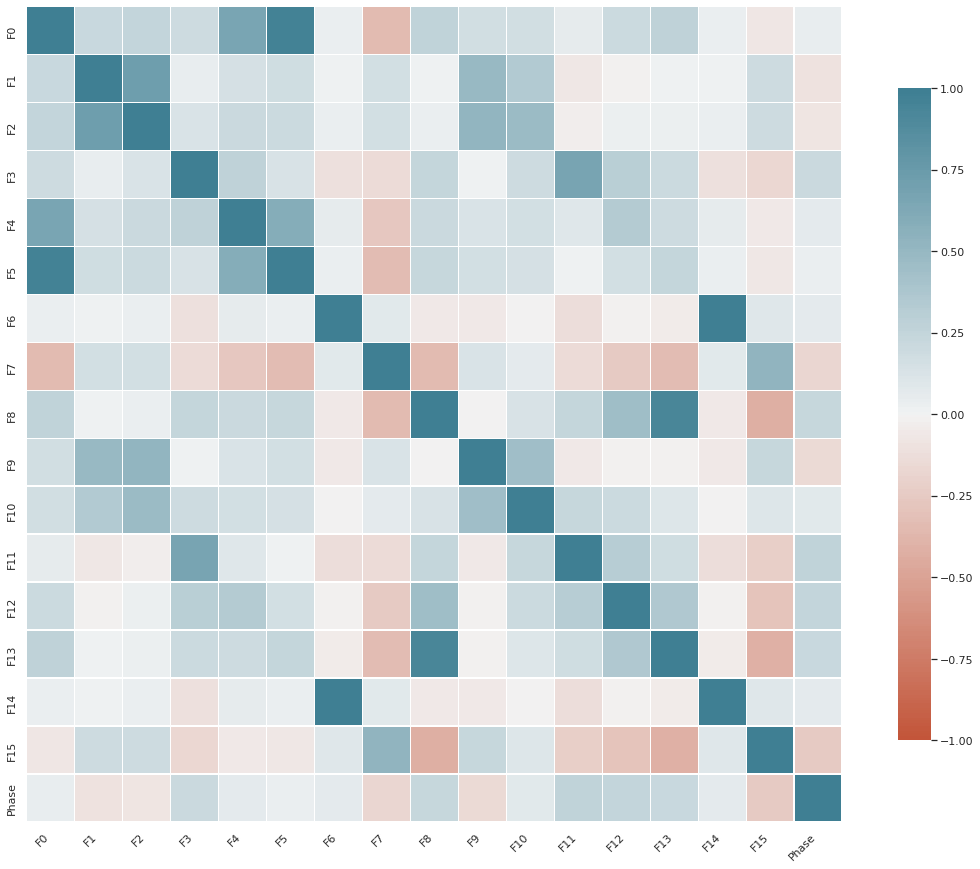

In [ ]:
##################################################   lest see training data linier relationship #####################################
import seaborn as sns
import seaborn as sns; sns.set_theme()
fig, ax = plt.subplots(figsize=(20, 15))
corr_red = df.corr()
ax_red = sns.heatmap(
    corr_red,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    #annot=True,
    linewidth=0.3, cbar_kws={"shrink": .8}
)
ax_red.set_xticklabels(
    ax_red.get_xticklabels(), rotation=45, horizontalalignment="right"
);

In [ ]:
#df['Ictal_phases']=pd.cut(df['Phase'],bins=[0,1,1.1,2],labels=['pre','inter','ictal'])

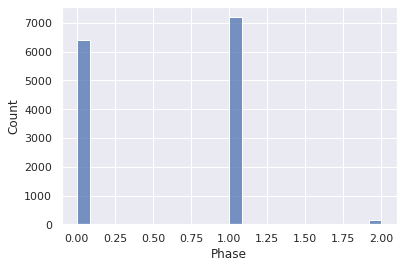

In [ ]:
sns.histplot(df.Phase)#data unbalance

In [ ]:
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({1.0: 7200, 0.0: 6423, 2.0: 139})


In [ ]:
n=len(y)
n=round(n,0)
n

13762

In [ ]:
# General imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from deepchecks.datasets.classification import iris
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Load Data
y = data.Phase#################################### target 
X=data.iloc[:,~data.columns.isin(['Phase'])]#' regressors


#X=X.set_index('Date')
#y=y.set_index('Date')

#smote = SMOTE(random_state=42, sampling_strategy=1)
#X, y = smote.fit_resample(X,y)
sm = SMOTE(sampling_strategy = {1:n, 0:n, 2:n})
X, y = sm.fit_resample(X, y)
Counter(y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning:

After over-sampling, the number of samples (13762) in class 1 will be larger than the number of samples in the majority class (class #1.0 -> 7200)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning:

After over-sampling, the number of samples (13762) in class 0 will be larger than the number of samples in the majority class (class #1.0 -> 7200)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning:

After over-sampling, the number of samples (13762) in class 2 will be larger than the number of samples in the majority class (class #1.0 -> 7200)



Counter({0.0: 13762, 1.0: 13762, 2.0: 13762})

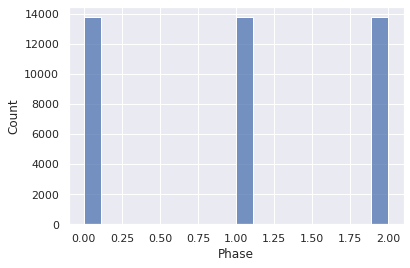

In [ ]:
sns.histplot(y)#data unbalance corrected 

In [ ]:
######################################################      standardizing X   #####################
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
X= r_scaler.fit_transform(X)

In [ ]:

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

# Train Model
clf_rf = RandomForestClassifier()
parametrs = {'n_estimators': range(10, 50, 10),
'max_depth': range(3, 12, 2),
'min_samples_leaf': range(1, 7),
'min_samples_split': range(2, 6, 2),
'max_features': ('auto', 'sqrt', 'log2')}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5, n_jobs=-1, verbose=1)
grid_search_cv_clf.fit(trainX, trainy)
grid_search_cv_clf.best_params_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


{'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(testX, testy)##accuracy=0.856

0.8563816904819569

## Define a Dataset Object

Initialize the [Dataset object](../../user-guide/dataset_object.rst), stating the relevant metadata about the dataset (e.g. the name for the label column) <br>
Check out the Dataset's attributes to see which additional special columns can be declared and used (e.g. date column, index column).

In [ ]:
data.columns

Index(['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'Phase'],
      dtype='object')

In [ ]:
trainX1 = pd.DataFrame(trainX, columns = ['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10','F11', 'F12', 'F13', 'F14', 'F15'])
trainy1 = pd.DataFrame(trainy, columns = ['Phase'])
testX1 = pd.DataFrame(testX, columns = ['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10','F11', 'F12', 'F13', 'F14', 'F15'])
testy1 = pd.DataFrame(testy, columns = ['Phase'])
df_train=trainX1.join(trainy1)
df_test=testX1.join(testy1)


In [ ]:
df_train.columns

Index(['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'Phase'],
      dtype='object')

In [ ]:
from deepchecks import Dataset

# We explicitly state that this dataset has no categorical features, otherwise they will be automatically inferred
# If the dataset has categorical features, the best practice is to pass a list with their names
label_col='Phase'
ds_train = Dataset(df_train, label=label_col, cat_features=[])
ds_test =  Dataset(df_test,  label=label_col, cat_features=[])

### Run the integrity suite

If you still haven't started modeling and just have a single dataset, you can use the ``single_dataset_integrity``:

In [ ]:
from deepchecks.suites import single_dataset_integrity

integ_suite = single_dataset_integrity()
integ_suite.run(ds_train)

Single Dataset Integrity Suite:   0%|          | 0/8 [00:00<?, ? Check/s]

<!DOCTYPE html>
 
 
 
 Suite Output 
 
 
 
 
 

<!-- Load require.js. Delete this if your page already loads require.js -->

In [ ]:
#model evaluation 

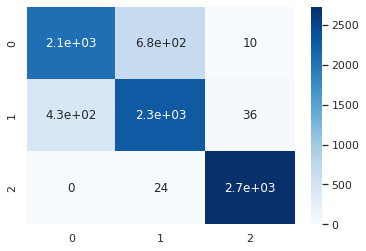

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = best_clf.predict(testX)
sns.heatmap(confusion_matrix(testy, y_pred), annot=True, cmap="Blues")

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(testy, y_pred, labels=[0,1,2]))#target_names=target_names class unballance 

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      2753
           1       0.76      0.83      0.80      2753
           2       0.98      0.99      0.99      2752

    accuracy                           0.86      8258
   macro avg       0.86      0.86      0.86      8258
weighted avg       0.86      0.86      0.86      8258



In [ ]:
#Accuracy=0.86 / F1 score =0.99 for the minor class 2 